In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Estimate CO2 removal with varying rock mass

##### Annual rock mass

In [104]:
# Demand (Without ERW) linearly decrease from 19Mt/yr to 15Mt/yr from 2026-2035 (end of 2025-end of 2034)
demand_change = np.linspace(19,15,11)
demand = np.concatenate([demand_change,np.full(15,15)])

# Extraction (Mt/yr)
Site = 96 #Number of extraction sites
Capacity_initial = 225 * 10**-3 # 225kt/yr in 2025
Capacity_interim = 338 * 10**-3 # 338kt/yr by 2035
supply_interim = np.linspace(Capacity_initial*Site,Capacity_interim*Site,11) # Assume linear propagation
scale_1 = 1.07 # Scaling up after 2035 in scenario 1
scale_2 = 1.15 # Scaling up after 2035 in scenario 2
supply_1 = np.concatenate([supply_interim, Capacity_interim*Site * scale_1**np.arange(1,16)]) # Cap at 100Mt/yr
supply_2 = np.concatenate([supply_interim, Capacity_interim*Site * scale_2**np.arange(1,12), np.full(4,160)]) # Cap at 160Mt/yr

# Net ERW rock
net_1 = supply_1 - demand # Scenario 1
net_2 = supply_2 - demand # Scenario 2

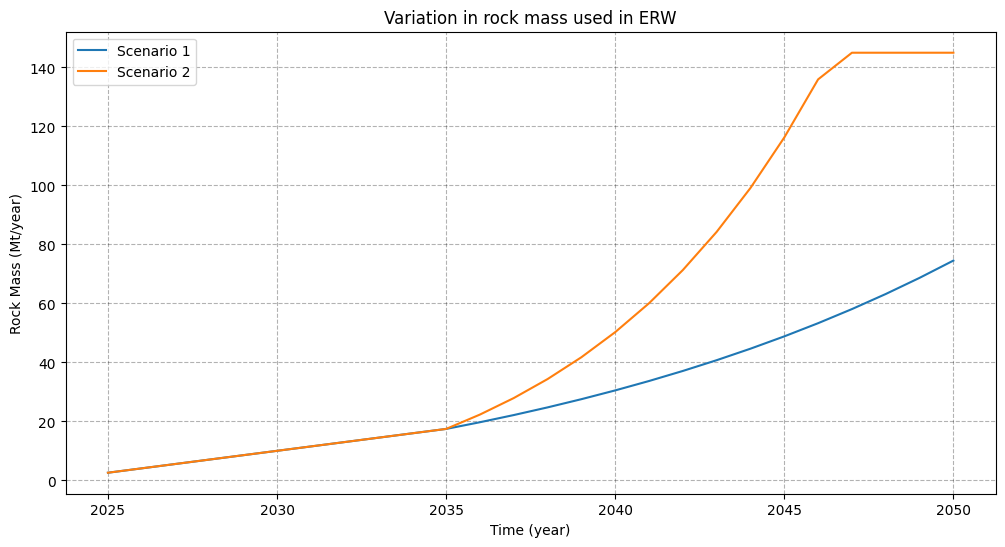

In [105]:
years = np.arange(2025,2051,1)

plt.figure(figsize=(12, 6))
plt.plot(years, net_1, label='Scenario 1')
plt.plot(years, net_2, label ='Scenario 2')
plt.grid(color='black',linestyle='--', alpha=0.3)
plt.legend()
plt.title('Variation in rock mass used in ERW')
plt.xlabel('Time (year)')
plt.ylabel('Rock Mass (Mt/year)')
plt.savefig("Mass Rock", bbox_inches='tight')

In [120]:
# Dunite Rock for ERW
net_dunite = np.concatenate([net_1[:11],np.full(15,net_1[10])])

In [54]:
Particle_size = 0.00001 # in m (=10μm)
CDR_bas = 0.292 # CO2 removal potential for Basalt
CDR_dun = 0.795757 # CO2 removal potential for Dunite
W_crag = 8.66076 * 10**-11 # Dissolution rate for Cragmill Basalt in molm^-2s^-1
W_mid = 1.1709 * 10**-10 # Dissolution rate for Middleton Basalt in molm^-2s^-1
W_dun = 7.4545 * 10**-11 # Dissolution rate for Dunite in molm^-2s^-1
V = 57 * 10**-6 # Molar volume m^3mol^-1

# varying rock mass annually (in tonnes) from 2026 to 2050
rock_mass = np.concatenate([np.linspace(5,9,9),np.linspace(10,100,17)])
#rock_mass = np.linspace(125,126,76)

In [180]:
# Function to calculate annuual CO2 removal and the cumulative removal
def removal(size, years, rock_mass, W, R): #Particle size(grained), end of 2025 - end of 2050, rock injection per year, dissolution rate, CO2 capture potential
    dissolution = [] 
    for year in range(years):
        percentage_dissolution = min(((size**3 - (size - 2 * W * V * (year + 1) * 365 * 24 * 3600)**3) / size**3),1) # Calculate fraction of CO2 dissolution to its maximum
                                                                                                                     # Dissolution rate max = 1
        dissolution.append(percentage_dissolution)
    annual_removal = []
    cumulative_removal = []

# Annual
    for year in range(years):
        yearly_removal = 0
        for i in range(year + 1):
            if i == year:
                yearly_removal += rock_mass[i] * R * dissolution[0] #First year
            else:
                yearly_removal += rock_mass[i] * R * (dissolution[year - i] - dissolution[year - i - 1]) #To not double count annual removal by including past removal
        
        annual_removal.append(yearly_removal)
        
# Cumulative
        cumulative_sum = sum(rock_mass[i] * R * dissolution[year - i] for i in range(year + 1))
        cumulative_removal.append(cumulative_sum)

    return annual_removal, cumulative_removal

# Running the function for 26 years (2025–2050)
removal_results_crag_1, cumulative_results_crag_1 = removal(Particle_size, 25, net_1[:26], W_crag, CDR_bas)
removal_results_mid_1, cumulative_results_mid_1 = removal(Particle_size, 25, net_1[:26], W_mid, CDR_bas)
removal_results_crag_2, cumulative_results_crag_2 = removal(Particle_size, 25, net_2[:26], W_crag, CDR_bas)
removal_results_mid_2, cumulative_results_mid_2 = removal(Particle_size, 25, net_2[:26], W_mid, CDR_bas)
removal_results_dun, cumulative_results_dun = removal(Particle_size, 25, net_dunite, W_dun, CDR_dun)


# Display results
print("Annual Removal:")
for year, result in zip(range(2026, 2026 + len(removal_results)), removal_results_crag_1):
    print(f"Year {year}: {result:.4f} MtCO2 removed")

print("\nCumulative Removal:")
for year, result in zip(range(2026, 2026 + len(cumulative_results)), cumulative_results_crag_1):
    print(f"Year {year}: {result:.4f} MtCO2 removed")

Annual Removal:
Year 2026: 0.0687 MtCO2 removed
Year 2027: 0.1724 MtCO2 removed
Year 2028: 0.3088 MtCO2 removed
Year 2029: 0.4756 MtCO2 removed
Year 2030: 0.6707 MtCO2 removed
Year 2031: 0.8920 MtCO2 removed
Year 2032: 1.1376 MtCO2 removed
Year 2033: 1.4054 MtCO2 removed
Year 2034: 1.6938 MtCO2 removed
Year 2035: 2.0008 MtCO2 removed
Year 2036: 2.3249 MtCO2 removed
Year 2037: 2.6853 MtCO2 removed
Year 2038: 3.0833 MtCO2 removed
Year 2039: 3.5204 MtCO2 removed
Year 2040: 3.9984 MtCO2 removed
Year 2041: 4.5192 MtCO2 removed
Year 2042: 5.0848 MtCO2 removed
Year 2043: 5.6974 MtCO2 removed
Year 2044: 6.3596 MtCO2 removed
Year 2045: 7.0741 MtCO2 removed
Year 2046: 7.8439 MtCO2 removed
Year 2047: 8.6720 MtCO2 removed
Year 2048: 9.5621 MtCO2 removed
Year 2049: 10.5180 MtCO2 removed
Year 2050: 11.5437 MtCO2 removed

Cumulative Removal:
Year 2026: 0.0687 MtCO2 removed
Year 2027: 0.2412 MtCO2 removed
Year 2028: 0.5500 MtCO2 removed
Year 2029: 1.0256 MtCO2 removed
Year 2030: 1.6963 MtCO2 removed
Y

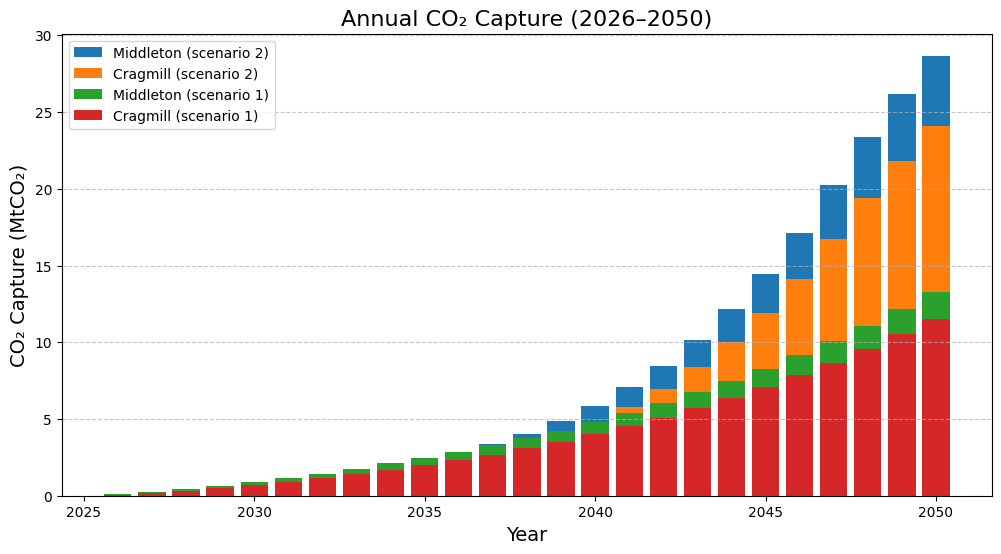

In [181]:
years = np.arange(2026,2051,1)
plt.figure(figsize=(12, 6))
plt.bar(years, removal_results_mid_2,label='Middleton (scenario 2)')
plt.bar(years, removal_results_crag_2,label='Cragmill (scenario 2)')
plt.bar(years, removal_results_mid_1,label='Middleton (scenario 1)')
plt.bar(years, removal_results_crag_1,label='Cragmill (scenario 1)')
plt.title('Annual CO₂ Capture (2026–2050)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('CO₂ Capture (MtCO₂)', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.savefig("Basalt CO2", bbox_inches='tight')
plt.show()

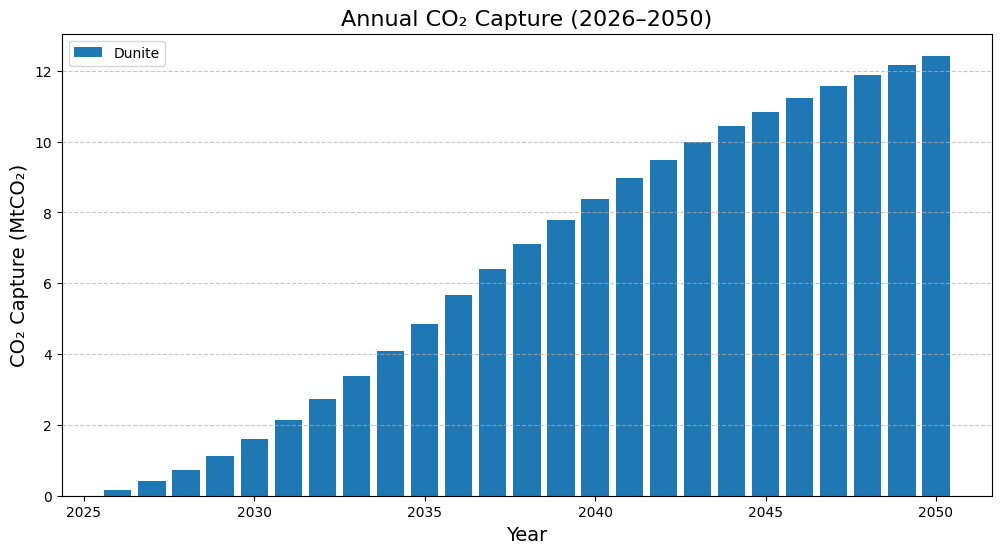

In [182]:
years = np.arange(2026,2051,1)
plt.figure(figsize=(12, 6))
plt.bar(years, removal_results_dun,label='Dunite')
plt.title('Annual CO₂ Capture (2026–2050)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('CO₂ Capture (MtCO₂)', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.savefig("Dunite CO2", bbox_inches='tight')
plt.show()

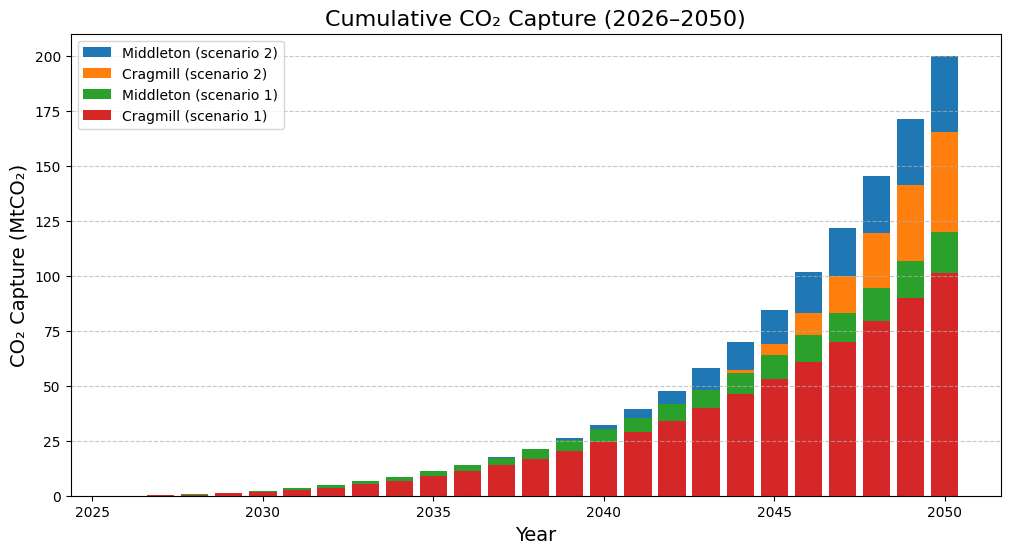

In [220]:
years = np.arange(2026,2051,1)
plt.figure(figsize=(12, 6))
plt.bar(years, cumulative_results_mid_2,label='Middleton (scenario 2)')
plt.bar(years, cumulative_results_crag_2,label='Cragmill (scenario 2)')
plt.bar(years, cumulative_results_mid_1,label='Middleton (scenario 1)')
plt.bar(years, cumulative_results_crag_1,label='Cragmill (scenario 1)')
plt.title('Cumulative CO₂ Capture (2026–2050)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('CO₂ Capture (MtCO₂)', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.savefig("Basalt CO2", bbox_inches='tight')
plt.show()

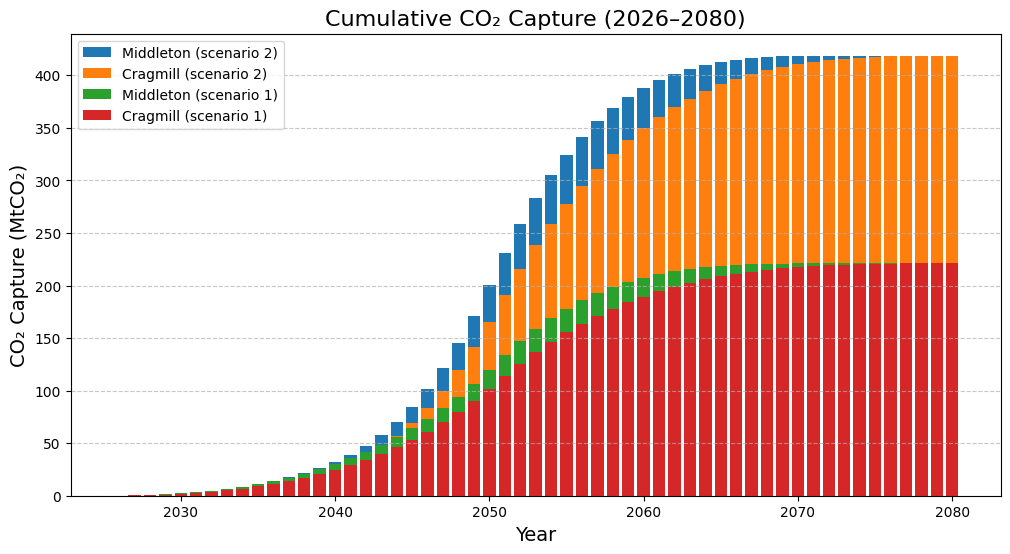

In [219]:
years = np.arange(2026,2081,1)
plt.figure(figsize=(12, 6))
plt.bar(years, cumulative_results_mid_2_fut,label='Middleton (scenario 2)')
plt.bar(years, cumulative_results_crag_2_fut,label='Cragmill (scenario 2)')
plt.bar(years, cumulative_results_mid_1_fut,label='Middleton (scenario 1)')
plt.bar(years, cumulative_results_crag_1_fut,label='Cragmill (scenario 1)')
plt.title('Cumulative CO₂ Capture (2026–2080)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('CO₂ Capture (MtCO₂)', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.savefig("Cumulative CO2 Future", bbox_inches='tight')
plt.show()

### Future observation (no rocks beyond 2050)

In [215]:
fut_1 = np.concatenate([net_1,np.zeros(30)])
fut_2 = np.concatenate([net_2,np.zeros(30)])
fut_dun = np.concatenate([net_dunite,np.zeros(30)])

removal_results_crag_1_fut, cumulative_results_crag_1_fut = removal(Particle_size, 55, fut_1, W_crag, CDR_bas)
removal_results_mid_1_fut, cumulative_results_mid_1_fut = removal(Particle_size, 55, fut_1, W_mid, CDR_bas)
removal_results_crag_2_fut, cumulative_results_crag_2_fut = removal(Particle_size, 55, fut_2, W_crag, CDR_bas)
removal_results_mid_2_fut, cumulative_results_mid_2_fut = removal(Particle_size, 55, fut_2, W_mid, CDR_bas)
removal_results_dun_fut, cumulative_results_dun_fut = removal(Particle_size, 55, fut_dun, W_dun, CDR_dun)

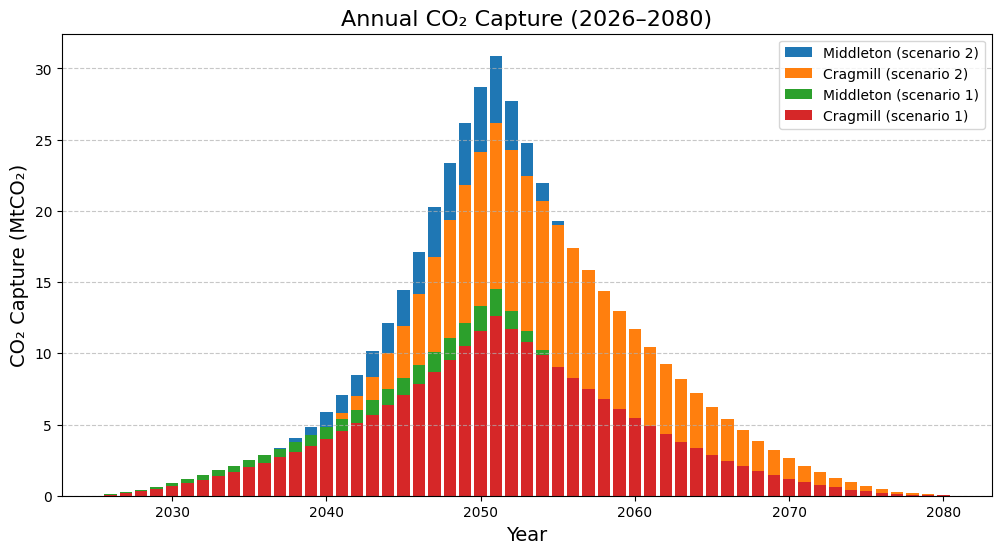

In [217]:
years = np.arange(2026,2081,1)
plt.figure(figsize=(12, 6))
plt.bar(years, removal_results_mid_2_fut,label='Middleton (scenario 2)')
plt.bar(years, removal_results_crag_2_fut,label='Cragmill (scenario 2)')
plt.bar(years, removal_results_mid_1_fut,label='Middleton (scenario 1)')
plt.bar(years, removal_results_crag_1_fut,label='Cragmill (scenario 1)')
plt.title('Annual CO₂ Capture (2026–2080)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('CO₂ Capture (MtCO₂)', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.savefig("Basalt CO2 Future", bbox_inches='tight')
plt.show()

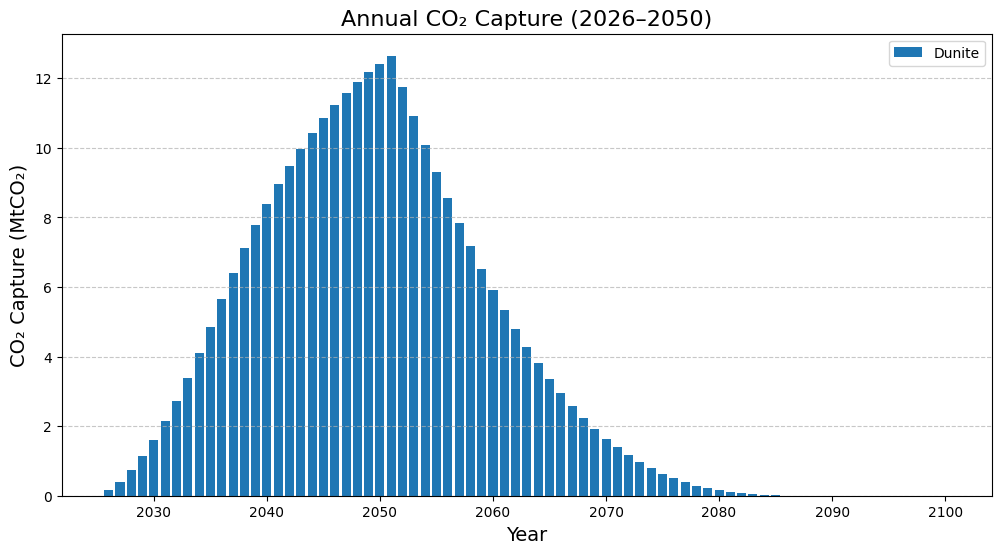

In [178]:
plt.figure(figsize=(12, 6))
plt.bar(years, removal_results_dun_fut,label='Dunite')
plt.title('Annual CO₂ Capture (2026–2050)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('CO₂ Capture (MtCO₂)', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.savefig("Dunite CO2", bbox_inches='tight')
plt.show()

# Estimate CO2 removal with larger particle size

In [222]:
# Particle size 10, 20, 30, 50, 100
removal_results_mid_2, cumulative_results_mid_2 = removal(Particle_size, 25, net_2[:26], W_mid, CDR_bas)
removal_results_mid_2_20, cumulative_results_mid_2_20 = removal(Particle_size*2, 25, net_2[:26], W_mid, CDR_bas)
removal_results_mid_2_30, cumulative_results_mid_2_30 = removal(Particle_size*3, 25, net_2[:26], W_mid, CDR_bas)
removal_results_mid_2_50, cumulative_results_mid_2_50 = removal(Particle_size*5, 25, net_2[:26], W_mid, CDR_bas)
removal_results_mid_2_100, cumulative_results_mid_2_100 = removal(Particle_size*10, 25, net_2[:26], W_mid, CDR_bas)

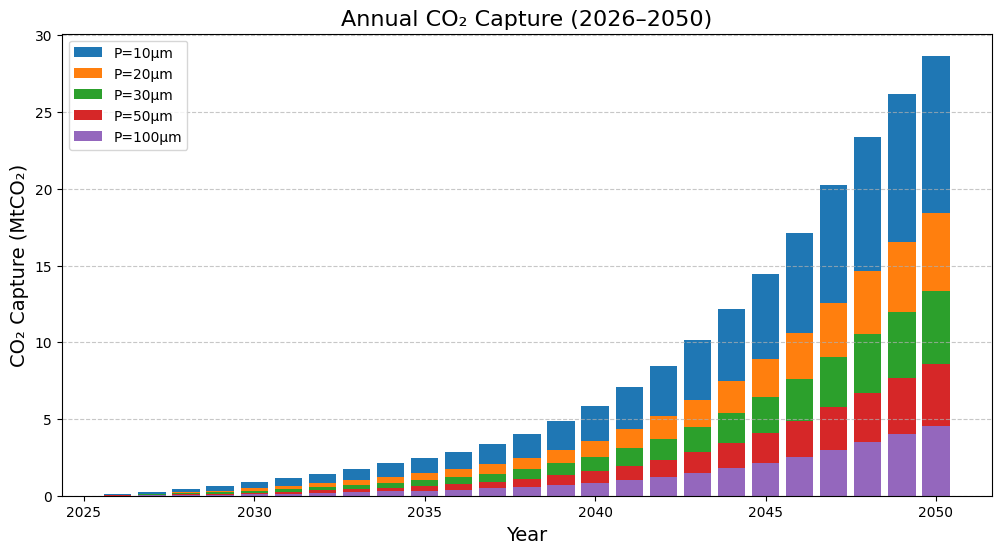

In [223]:
years = np.arange(2026,2051,1)
plt.figure(figsize=(12, 6))
plt.bar(years, removal_results_mid_2,label='P=10µm')
plt.bar(years, removal_results_mid_2_20,label='P=20µm')
plt.bar(years, removal_results_mid_2_30,label='P=30µm')
plt.bar(years, removal_results_mid_2_50,label='P=50µm')
plt.bar(years, removal_results_mid_2_100,label='P=100µm')
plt.title('Annual CO₂ Capture (2026–2050)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('CO₂ Capture (MtCO₂)', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.savefig("Particle Size CO2", bbox_inches='tight')
plt.show()